In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

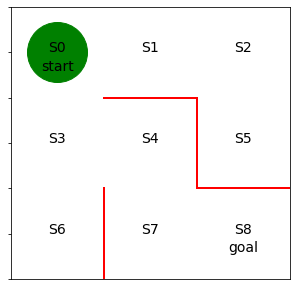

In [2]:
fig = plt.figure(figsize = (5,5))
ax = plt.gca()

plt.plot([1,1], [0,1], color = 'red', linewidth = 2)
plt.plot([1,2], [2,2], color = 'red', linewidth = 2)
plt.plot([2,2], [2,1], color = 'red', linewidth = 2)
plt.plot([2,3], [1,1], color = 'red', linewidth = 2)

plt.text(0.5, 2.5, 'S0', size = 14, ha = 'center')
plt.text(1.5, 2.5, 'S1', size = 14, ha = 'center')
plt.text(2.5, 2.5, 'S2', size = 14, ha = 'center')
plt.text(0.5, 1.5, 'S3', size = 14, ha = 'center')
plt.text(1.5, 1.5, 'S4', size = 14, ha = 'center')
plt.text(2.5, 1.5, 'S5', size = 14, ha = 'center')
plt.text(0.5, 0.5, 'S6', size = 14, ha = 'center')
plt.text(1.5, 0.5, 'S7', size = 14, ha = 'center')
plt.text(2.5, 0.5, 'S8', size = 14, ha = 'center')
plt.text(0.5, 2.3, 'start', size = 14, ha = 'center')
plt.text(2.5, 0.3, 'goal', size = 14, ha = 'center')


ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, labelbottom = False, right = False, labelleft = False)

line, = ax.plot([0.5], [2.5], marker = 'o', color = 'g', markersize = 60)


In [3]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],
                   [np.nan, 1, np.nan, 1],
                   [np.nan, np.nan, 1, 1],
                   [1, 1, 1, np.nan],
                   [np.nan, np.nan, 1, 1],
                   [1, np.nan, np.nan, np.nan],
                   [1, np.nan, np.nan, np.nan],
                   [1, 1, np.nan, np.nan]])

In [4]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    return pi

In [16]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [19]:
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    
    next_direction = np.random.choice(direction, p = pi[s, :])
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
        
    return s_next


    
        

In [20]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while(1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return state_history

state_history = goal_maze(pi_0)

In [21]:
print(state_history)

[0, 3, 0, 1, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 0, 1, 0, 3, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 3, 6, 3, 0, 3, 0, 1, 0, 3, 6, 3, 0, 1, 2, 5, 2, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 1, 0, 1, 0, 1, 0, 1, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 0, 1, 0, 3, 0, 3, 6, 3, 6, 3, 6, 3, 6, 3, 4, 3, 0, 1, 2, 5, 2, 1, 0, 1, 0, 1, 0, 3, 0, 1, 2, 5, 2, 5, 2, 1, 2, 1, 2, 5, 2, 1, 2, 1, 0, 1, 0, 3, 4, 7, 8]


In [23]:
print(len(state_history))

149


In [33]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = len(state_history), interval = 200, repeat = False)

HTML(anim.to_jshtml())

In [35]:
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        #pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [45]:
def get_action_and_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == 'up':
        action = 0
        s_next = s - 3
    elif next_direction == 'right':
        action = 1
        s_next = s + 1
    elif next_direction == 'down':
        action = 2
        s_next = s + 3
    elif next_direction == 'left':
        action = 3
        s_next = s - 1
        
    return [action, s_next]


        
    
    

In [46]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while(1):
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return s_a_history
    

In [48]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)

[[0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 2], [3, 2], [6, 0], [3, 1], [4, 3], [3, 2], [6, 0], [3, 0], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]


In [54]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    
    [m, n] = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                SA_ij = [SA for SA in s_a_history if SA ==  [i, j]]
                
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
    
    return new_theta



In [55]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49875    0.50125    0.        ]
 [0.         0.49750002 0.         0.50249998]
 [0.         0.         0.5        0.5       ]
 [0.33277732 0.33277732 0.33444537 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49875    0.50125    0.         0.        ]]


In [57]:
stop_epsilon = 10**-4

theta = theta_0.copy()
pi = pi_0

is_continue = True
count = 1

while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print('목표지점까지의 수 : ' + str(len(s_a_history)))
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi
                                

0.017463935880920933
목표지점까지의 수 : 15
0.006662186844936746
목표지점까지의 수 : 45
0.010056556566450325
목표지점까지의 수 : 61
0.023889990774085657
목표지점까지의 수 : 15
0.006966466517526304
목표지점까지의 수 : 95
0.00673172441154013
목표지점까지의 수 : 71
0.012179215934490173
목표지점까지의 수 : 63
0.013857877473508307
목표지점까지의 수 : 39
0.007268798030799162
목표지점까지의 수 : 77
0.02919334067594931
목표지점까지의 수 : 11
0.009153911393027625
목표지점까지의 수 : 75
0.017724940881630902
목표지점까지의 수 : 23
0.0322239053579334
목표지점까지의 수 : 7
0.032151159281534114
목표지점까지의 수 : 7
0.014505396538943172
목표지점까지의 수 : 25
0.012694469565754762
목표지점까지의 수 : 29
0.012570231644928487
목표지점까지의 수 : 63
0.011880804086748853
목표지점까지의 수 : 17
0.012792858067015467
목표지점까지의 수 : 21
0.02162687442940342
목표지점까지의 수 : 15
0.008109392320613806
목표지점까지의 수 : 63
0.008888704773201805
목표지점까지의 수 : 61
0.01623954687136503
목표지점까지의 수 : 31
0.008643932036974333
목표지점까지의 수 : 41
0.013387913288607167
목표지점까지의 수 : 51
0.047768729595164705
목표지점까지의 수 : 5
0.013166900059050302
목표지점까지의 수 : 51
0.014141705562783657
목표지점까지의 수 : 33
0

0.029146180599192828
목표지점까지의 수 : 13
0.013513204025026981
목표지점까지의 수 : 13
0.018600352447711882
목표지점까지의 수 : 7
0.01516875750522717
목표지점까지의 수 : 27
0.011744819973332016
목표지점까지의 수 : 11
0.01852995923924869
목표지점까지의 수 : 7
0.015578401546161719
목표지점까지의 수 : 5
0.01456809525189992
목표지점까지의 수 : 9
0.02171303956203474
목표지점까지의 수 : 7
0.014214531517305284
목표지점까지의 수 : 9
0.021618370487114624
목표지점까지의 수 : 7
0.015378496676358211
목표지점까지의 수 : 5
0.015167199179166285
목표지점까지의 수 : 5
0.014959515132247803
목표지점까지의 수 : 5
0.01055682563726451
목표지점까지의 수 : 11
0.01260108420393563
목표지점까지의 수 : 13
0.019581711092661908
목표지점까지의 수 : 9
0.021239866157554854
목표지점까지의 수 : 7
0.021112018385819997
목표지점까지의 수 : 7
0.014962351381944627
목표지점까지의 수 : 5
0.014757355727528232
목표지점까지의 수 : 5
0.014555893322179825
목표지점까지의 수 : 5
0.014357901283512858
목표지점까지의 수 : 5
0.014163317428844857
목표지점까지의 수 : 5
0.019079480383069142
목표지점까지의 수 : 9
0.012101951542685757
목표지점까지의 수 : 15
0.01857615912015001
목표지점까지의 수 : 19
0.014863374246113836
목표지점까지의 수 : 17
0.0207053724262157

0.006018838024315118
목표지점까지의 수 : 5
0.009554415082537307
목표지점까지의 수 : 7
0.009511902054395546
목표지점까지의 수 : 7
0.00600320340446385
목표지점까지의 수 : 5
0.005942037237188641
목표지점까지의 수 : 5
0.009430009158535257
목표지점까지의 수 : 7
0.005921683383537518
목표지점까지의 수 : 5
0.005861507915751393
목표지점까지의 수 : 5
0.005802197376659504
목표지점까지의 수 : 5
0.005743736147417786
목표지점까지의 수 : 5
0.005686108937326739
목표지점까지의 수 : 5
0.00562930077635998
목표지점까지의 수 : 5
0.005573297007863839
목표지점까지의 수 : 5
0.007779284657307123
목표지점까지의 수 : 7
0.005521823409723861
목표지점까지의 수 : 5
0.00546741525397014
목표지점까지의 수 : 5
0.009522498651225786
목표지점까지의 수 : 9
0.0054817400081898365
목표지점까지의 수 : 5
0.005427825769237102
목표지점까지의 수 : 5
0.008265054975051686
목표지점까지의 수 : 9
0.005411433553328113
목표지점까지의 수 : 5
0.005358583899482142
목표지점까지의 수 : 5
0.0053064665953346385
목표지점까지의 수 : 5
0.005255068827415416
목표지점까지의 수 : 5
0.005204378045446767
목표지점까지의 수 : 5
0.005154381956381529
목표지점까지의 수 : 5
0.008724982925927188
목표지점까지의 수 : 7
0.005115713000819255
목표지점까지의 수 : 5
0.005066951767009262


0.002893643311153861
목표지점까지의 수 : 5
0.006798189790284036
목표지점까지의 수 : 7
0.0029120215377502826
목표지점까지의 수 : 5
0.0028891443522614663
목표지점까지의 수 : 5
0.005211259945871058
목표지점까지의 수 : 7
0.005077585355428946
목표지점까지의 수 : 7
0.002880052705874561
목표지점까지의 수 : 5
0.002857680517727834
목표지점까지의 수 : 5
0.0068466254739839374
목표지점까지의 수 : 9
0.0028619574046078455
목표지점까지의 수 : 5
0.002839891234422985
목표지점까지의 수 : 5
0.002818077129065219
목표지점까지의 수 : 5
0.0027965113002673472
목표지점까지의 수 : 5
0.0027751900295441695
목표지점까지의 수 : 5
0.0027541096666888684
목표지점까지의 수 : 5
0.0027332666283210877
목표지점까지의 수 : 5
0.010249889590289822
목표지점까지의 수 : 7
0.002727058890392965
목표지점까지의 수 : 5
0.002706563612474011
목표지점까지의 수 : 5
0.0026862963966893527
목표지점까지의 수 : 5
0.0026662539028327464
목표지점까지의 수 : 5
0.0026464328507662463
목표지점까지의 수 : 5
0.0026268300191598926
목표지점까지의 수 : 5
0.006450115324533184
목표지점까지의 수 : 7
0.002644567620175134
목표지점까지의 수 : 5
0.0026248800384083004
목표지점까지의 수 : 5
0.0056654625703530595
목표지점까지의 수 : 7
0.005730682056916819
목표지점까지의 수 : 7
0.0065

0.0016378845913240098
목표지점까지의 수 : 5
0.0016284208232587999
목표지점까지의 수 : 5
0.0016190374447225334
목표지점까지의 수 : 5
0.004060907757061374
목표지점까지의 수 : 7
0.0016200052165845427
목표지점까지의 수 : 5
0.0016107058092696483
목표지점까지의 수 : 5
0.0016014848165505496
목표지점까지의 수 : 5
0.0015923413712013307
목표지점까지의 수 : 5
0.00481810105099631
목표지점까지의 수 : 7
0.0016039691259282021
목표지점까지의 수 : 5
0.004875626035130157
목표지점까지의 수 : 7
0.0016164993954495832
목표지점까지의 수 : 5
0.0016071595373383443
목표지점까지의 수 : 5
0.0015978993355346069
목표지점까지의 수 : 5
0.007154127850332641
목표지점까지의 수 : 11
0.0016285772004997756
목표지점까지의 수 : 5
0.0016190953825931664
목표지점까지의 수 : 5
0.0016096952709220846
목표지점까지의 수 : 5
0.0016003759355657163
목표지점까지의 수 : 5
0.001591136459723301
목표지점까지의 수 : 5
0.0015819759394905056
목표지점까지의 수 : 5
0.0015728934836471906
목표지점까지의 수 : 5
0.0015638882134426865
목표지점까지의 수 : 5
0.0015549592623906455
목표지점까지의 수 : 5
0.00154610577606442
목표지점까지의 수 : 5
0.0015373269118973618
목표지점까지의 수 : 5
0.0015286218389871306
목표지점까지의 수 : 5
0.0015199897379039526
목표지점까지의 수 : 5

0.0034395773481612976
목표지점까지의 수 : 7
0.0010277589710479956
목표지점까지의 수 : 5
0.001022991969605154
목표지점까지의 수 : 5
0.003329003872422631
목표지점까지의 수 : 7
0.0010244728092750066
목표지점까지의 수 : 5
0.0010197380636549347
목표지점까지의 수 : 5
0.0010150355423624927
목표지점까지의 수 : 5
0.0010103649574891363
목표지점까지의 수 : 5
0.0010057260242956473
목표지점까지의 수 : 5
0.0033465588291231724
목표지점까지의 수 : 7
0.0010078418448650067
목표지점까지의 수 : 5
0.0010032281432163087
목표지점까지의 수 : 5
0.0009986455238974873
목표지점까지의 수 : 5
0.000994093712142187
목표지점까지의 수 : 5
0.0009895724361766237
목표지점까지의 수 : 5
0.0009850814271790964
목표지점까지의 수 : 5
0.0009806204192454315
목표지점까지의 수 : 5
0.0009761891493492228
목표지점까지의 수 : 5
0.0009717873573033622
목표지점까지의 수 : 5
0.007555596070813776
목표지점까지의 수 : 7
0.0009757771776046781
목표지점까지의 수 : 5
0.0009713838847133296
목표지점까지의 수 : 5
0.0009670196924859015
목표지점까지의 수 : 5
0.0009626843480410249
목표지점까지의 수 : 5
0.0009583776012059772
목표지점까지의 수 : 5
0.0009540992044791072
목표지점까지의 수 : 5
0.0009498489129980067
목표지점까지의 수 : 5
0.0009456264845065718
목표지점까지의 수 

0.0007939212606525234
목표지점까지의 수 : 5
0.0007906591165803903
목표지점까지의 수 : 5
0.000787416798541829
목표지점까지의 수 : 5
0.0007841941477552891
목표지점까지의 수 : 5
0.0007809910070107895
목표지점까지의 수 : 5
0.0007778072206505657
목표지점까지의 수 : 5
0.0007746426345546162
목표지점까지의 수 : 5
0.0007714970961179915
목표지점까지의 수 : 5
0.0007683704542373188
목표지점까지의 수 : 5
0.000765262559290561
목표지점까지의 수 : 5
0.0007621732631203429
목표지점까지의 수 : 5
0.0007591024190180054
목표지점까지의 수 : 5
0.0030427595401957552
목표지점까지의 수 : 7
0.000767248178920793
목표지점까지의 수 : 5
0.000764139261802757
목표지점까지의 수 : 5
0.0007610490086539801
목표지점까지의 수 : 5
0.0007579772716119204
목표지점까지의 수 : 5
0.000754923904264633
목표지점까지의 수 : 5
0.0007518887616324577
목표지점까지의 수 : 5
0.0007488717001523995
목표지점까지의 수 : 5
0.016482139934652622
목표지점까지의 수 : 15
0.0007485467084565253
목표지점까지의 수 : 5
0.0007455519730292133
목표지점까지의 수 : 5
0.0007425749841874496
목표지점까지의 수 : 5
0.0007396156031702177
목표지점까지의 수 : 5
0.0007366736925566546
목표지점까지의 수 : 5
0.00073374911625574
목표지점까지의 수 : 5
0.0007308417394884074
목표지점까지의 수 : 5

0.0005569189284369801
목표지점까지의 수 : 5
0.0005549501029000065
목표지점까지의 수 : 5
0.0005529916938579946
목표지점까지의 수 : 5
0.0005510436280110886
목표지점까지의 수 : 5
0.0005491058327041221
목표지점까지의 수 : 5
0.0005471782359158621
목표지점까지의 수 : 5
0.0005452607662558388
목표지점까지의 수 : 5
0.000543353352955106
목표지점까지의 수 : 5
0.0005414559258622477
목표지점까지의 수 : 5
0.002752472479295269
목표지점까지의 수 : 7
0.0005479535888528869
목표지점까지의 수 : 5
0.0005460270683855378
목표지점까지의 수 : 5
0.0005441107002682431
목표지점까지의 수 : 5
0.0005422044132434231
목표지점까지의 수 : 5
0.0005403081366770826
목표지점까지의 수 : 5
0.0005384218005510671
목표지점까지의 수 : 5
0.0005365453354609605
목표지점까지의 수 : 5
0.0005346786726037056
목표지점까지의 수 : 5
0.0005328217437768276
목표지점까지의 수 : 5
0.000530974481369715
목표지점까지의 수 : 5
0.0005291368183563128
목표지점까지의 수 : 5
0.0005273086882913065
목표지점까지의 수 : 5
0.0005254900253022603
목표지점까지의 수 : 5
0.0005236807640868722
목표지점까지의 수 : 5
0.0005218808399020183
목표지점까지의 수 : 5
0.0005200901885629612
목표지점까지의 수 : 5
0.0005183087464337988
목표지점까지의 수 : 5
0.0005165364504249106
목표지점까지의 수

0.00039588432257824796
목표지점까지의 수 : 5
0.00039468196616223444
목표지점까지의 수 : 5
0.0023493415576240663
목표지점까지의 수 : 7
0.0004008485521951252
목표지점까지의 수 : 5
0.0003996188092242059
목표지점까지의 수 : 5
0.0003983947735467265
목표지점까지의 수 : 5
0.0003971764096349188
목표지점까지의 수 : 5
0.00039596368224001713
목표지점까지의 수 : 5
0.0003947565563849481
목표지점까지의 수 : 5
0.000393554997367776
목표지점까지의 수 : 5
0.0003923589707542259
목표지점까지의 수 : 5
0.0003911684423787247
목표지점까지의 수 : 5
0.0003899833783386139
목표지점까지의 수 : 5
0.0003888037449934663
목표지점까지의 수 : 5
0.0003876295089650268
목표지점까지의 수 : 5
0.0003864606371283309
목표지점까지의 수 : 5
0.0003852970966160621
목표지점까지의 수 : 5
0.00038413885481368773
목표지점까지의 수 : 5
0.00038298587935415435
목표지점까지의 수 : 5
0.000381838138121475
목표지점까지의 수 : 5
0.0003806955992437071
목표지점까지의 수 : 5
0.00037955823109184564
목표지점까지의 수 : 5
0.002325726713993316
목표지점까지의 수 : 7
0.0003856875643933125
목표지점까지의 수 : 5
0.00038452296078499495
목표지점까지의 수 : 5
0.000383363687088252
목표지점까지의 수 : 5
0.0003822097105332517
목표지점까지의 수 : 5
0.0003810609986048749
목표지

목표지점까지의 수 : 5
0.000302252558705831
목표지점까지의 수 : 5
0.0003014259540031032
목표지점까지의 수 : 5
0.00030060281594479835
목표지점까지의 수 : 5
0.00029978312482481853
목표지점까지의 수 : 5
0.00029896686107806075
목표지점까지의 수 : 5
0.0018109513676873162
목표지점까지의 수 : 7
0.005209545592545054
목표지점까지의 수 : 9
0.00030635943868026483
목표지점까지의 수 : 5
0.00030552080841993873
목표지점까지의 수 : 5
0.00030468568578533375
목표지점까지의 수 : 5
0.00030385405094958753
목표지점까지의 수 : 5
0.0003030258842299481
목표지점까지의 수 : 5
0.00030220116608123057
목표지점까지의 수 : 5
0.0003013798770994426
목표지점까지의 수 : 5
0.00030056199801480055
목표지점까지의 수 : 5
0.000299747509698977
목표지점까지의 수 : 5
0.002119450077710583
목표지점까지의 수 : 7
0.00030517841568387244
목표지점까지의 수 : 5
0.00030434092251997377
목표지점까지의 수 : 5
0.00030350694877320436
목표지점까지의 수 : 5
0.0003026764744237763
목표지점까지의 수 : 5
0.0003018494796003142
목표지점까지의 수 : 5
0.000301025944569943
목표지점까지의 수 : 5
0.00030020584974398135
목표지점까지의 수 : 5
0.00029938917567206083
목표지점까지의 수 : 5
0.0002985759030423897
목표지점까지의 수 : 5
0.0002977660126818882
목표지점까지의 수 : 5
0.000

0.0002303024644437629
목표지점까지의 수 : 5
0.00022976627927253843
목표지점까지의 수 : 5
0.00022923198038357628
목표지점까지의 수 : 5
0.0002286995588839727
목표지점까지의 수 : 5
0.00022816900593232436
목표지점까지의 수 : 5
0.00022764031274104257
목표지점까지의 수 : 5
0.00022711347057204415
목표지점까지의 수 : 5
0.00022658847074000232
목표지점까지의 수 : 5
0.00022606530461147245
목표지점까지의 수 : 5
0.00022554396360257092
목표지점까지의 수 : 5
0.00022502443917957887
목표지점까지의 수 : 5
0.00022450672285955625
목표지점까지의 수 : 5
0.001751029334644414
목표지점까지의 수 : 7
0.00022817327795069536
목표지점까지의 수 : 5
0.00022764286159699873
목표지점까지의 수 : 5
0.00022711431159335924
목표지점까지의 수 : 5
0.0002265876191255116
목표지점까지의 수 : 5
0.00022606277543233202
목표지점까지의 수 : 5
0.00022553977180353804
목표지점까지의 수 : 5
0.00022501859958106232
목표지점까지의 수 : 5
0.0002244992501572972
목표지점까지의 수 : 5
0.0002239817149760001
목표지점까지의 수 : 5
0.0002234659855303335
목표지점까지의 수 : 5
0.00022295205336586577
목표지점까지의 수 : 5
0.00022243991007508956
목표지점까지의 수 : 5
0.00022192954730188008
목표지점까지의 수 : 5
0.00022142095673750514
목표지점까지의 수 : 5
0.0002209

0.000189502294496071
목표지점까지의 수 : 5
0.0001891012404974246
목표지점까지의 수 : 5
0.00018870146780597744
목표지점까지의 수 : 5
0.0001883029709417918
목표지점까지의 수 : 5
0.0001879057444578655
목표지점까지의 수 : 5
0.00018750978293358492
목표지점까지의 수 : 5
0.000187115080977426
목표지점까지의 수 : 5
0.00018672163322838893
목표지점까지의 수 : 5
0.00018632943435198217
목표지점까지의 수 : 5
0.00018593847904403542
목표지점까지의 수 : 5
0.0001855487620265328
목표지점까지의 수 : 5
0.00018516027805149347
목표지점까지의 수 : 5
0.00018477302189769812
목표지점까지의 수 : 5
0.00018438698837124762
목표지점까지의 수 : 5
0.00018400217230700802
목표지점까지의 수 : 5
0.00018361856856646645
목표지점까지의 수 : 5
0.00018323617203721589
목표지점까지의 수 : 5
0.00018285497763555203
목표지점까지의 수 : 5
0.00018247498030433788
목표지점까지의 수 : 5
0.00018209617501268455
목표지점까지의 수 : 5
0.0001817185567549364
목표지점까지의 수 : 5
0.00018134212055391855
목표지점까지의 수 : 5
0.00018096686145757657
목표지점까지의 수 : 5
0.0015217331187030048
목표지점까지의 수 : 7
0.0001837331576211472
목표지점까지의 수 : 5
0.00018334945239882779
목표지점까지의 수 : 5
0.00018296695842224056
목표지점까지의 수 : 5
0.0001825856

0.000141820911920075
목표지점까지의 수 : 5
0.0001415622239514594
목표지점까지의 수 : 5
0.00014130424834464875
목표지점까지의 수 : 5
0.00014104698247318324
목표지점까지의 수 : 5
0.00014079042371930965
목표지점까지의 수 : 5
0.0001405345694800858
목표지점까지의 수 : 5
0.0001402794171629744
목표지점까지의 수 : 5
0.00014002496418779806
목표지점까지의 수 : 5
0.0001397712079871244
목표지점까지의 수 : 5
0.00013951814600338987
목표지점까지의 수 : 5
0.00013926577569314293
목표지점까지의 수 : 5
0.0001390140945224591
목표지점까지의 수 : 5
0.0001387630999710142
목표지점까지의 수 : 5
0.00013851278952852278
목표지점까지의 수 : 5
0.00013826316069744451
목표지점까지의 수 : 5
0.00013801421099021542
목표지점까지의 수 : 5
0.00013776593793165572
목표지점까지의 수 : 5
0.001355378844826739
목표지점까지의 수 : 7
0.0001400510813153507
목표지점까지의 수 : 5
0.00013979654401119306
목표지점까지의 수 : 5
0.00013954270616428274
목표지점까지의 수 : 5
0.00013928956519675822
목표지점까지의 수 : 5
0.00013903711854089396
목표지점까지의 수 : 5
0.00013878536364266003
목표지점까지의 수 : 5
0.00013853429795817988
목표지점까지의 수 : 5
0.00013828391895689962
목표지점까지의 수 : 5
0.0001380342241185696
목표지점까지의 수 : 5
0.00013778521

목표지점까지의 수 : 5
0.00011107209295883012
목표지점까지의 수 : 5
0.00011089173713495735
목표지점까지의 수 : 5
0.00011071182465387415
목표지점까지의 수 : 5
0.00011053235405162308
목표지점까지의 수 : 5
0.00011035332387136602
목표지점까지의 수 : 5
0.0001101747326605982
목표지점까지의 수 : 5
0.00010999657897494373
목표지점까지의 수 : 5
0.00010981886137488399
목표지점까지의 수 : 5
0.00010964157842525274
목표지점까지의 수 : 5
0.00010946472870057046
목표지점까지의 수 : 5
0.00010928831077809502
목표지점까지의 수 : 5
0.00010911232324170919
목표지점까지의 수 : 5
0.00010893676468193975
목표지점까지의 수 : 5
0.00010876163369435803
목표지점까지의 수 : 5
0.00010858692887986271
목표지점까지의 수 : 5
0.00010841264884756292
목표지점까지의 수 : 5
0.00010823879220828864
목표지점까지의 수 : 5
0.00010806535758271264
목표지점까지의 수 : 5
0.00010789234359361022
목표지점까지의 수 : 5
0.0001077197488717277
목표지점까지의 수 : 5
0.00010754757205332435
목표지점까지의 수 : 5
0.00010737581177821219
목표지점까지의 수 : 5
0.0001072044666940962
목표지점까지의 수 : 5
0.00010703353545274755
목표지점까지의 수 : 5
0.00010686301671282428
목표지점까지의 수 : 5
0.00010669290913669499
목표지점까지의 수 : 5
0.00010652321139305483
목표지점

In [59]:
np.set_printoptions(precision = 3, suppress = True)
print(pi)

[[0.    0.012 0.988 0.   ]
 [0.    0.287 0.    0.713]
 [0.    0.    0.397 0.603]
 [0.011 0.976 0.012 0.   ]
 [0.    0.    0.985 0.015]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.015 0.985 0.    0.   ]]


In [62]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = len(s_a_history), interval = 200, repeat = False)

HTML(anim.to_jshtml())

In [76]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [77]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)



In [78]:
def get_action(s, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p = pi_0[s, :])
    else :
        next_direction = direction[np.nanargmax(Q[s, :])]
        
    if next_direction == 'up':
        action = 0
    elif next_direction == 'right':
        action = 1
    elif next_direction == 'down':
        action = 2
    elif next_direction == 'left':
        action = 3
        
    return action



In [79]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    next_direction = direction[a]
    
    if next_direction == 'up':
        s_next = s-3
    elif next_direction == 'right':
        s_next = s+1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
        
    return s_next


In [80]:
def Sara(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
        
    return Q

In [81]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while(1):
        a = a_next
        
        s_a_history[-1][1] = a
        s_next = get_s_next(s, a, Q, epsilon, pi)
        
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
            
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            
        Q = Sara(s, a, r, s_next, a_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
            
    return [s_a_history, Q]

In [82]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis = 1)
is_continue = True
episode = 1

while is_continue:
    print("episode : " + str(episode))
    
    epsilon = epsilon / 2
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis = 1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    
    print("목표단계까지 걸린 수 : " + str(len(s_a_history) - 1))
    
    episode = episode + 1
    if episode > 100:
        break

episode : 1
0.11518259847580514
목표단계까지 걸린 수 : 4
episode : 2
0.7656082729885141
목표단계까지 걸린 수 : 86
episode : 3
1.0474619075543226
목표단계까지 걸린 수 : 272
episode : 4
1.479460548533822
목표단계까지 걸린 수 : 686
episode : 5
0.06731306715783592
목표단계까지 걸린 수 : 10
episode : 6
0.06046834077547933
목표단계까지 걸린 수 : 4
episode : 7
0.059557443231144785
목표단계까지 걸린 수 : 4
episode : 8
0.05845598548162423
목표단계까지 걸린 수 : 4
episode : 9
0.05719337842341368
목표단계까지 걸린 수 : 4
episode : 10
0.055796298962821095
목표단계까지 걸린 수 : 4
episode : 11
0.05428887228882798
목표단계까지 걸린 수 : 4
episode : 12
0.052692846688650874
목표단계까지 걸린 수 : 4
episode : 13
0.05102776094742345
목표단계까지 걸린 수 : 4
episode : 14
0.049311104348597146
목표단계까지 걸린 수 : 4
episode : 15
0.047558469285877036
목표단계까지 걸린 수 : 4
episode : 16
0.04578369650523867
목표단계까지 걸린 수 : 4
episode : 17
0.04399901301240111
목표단계까지 걸린 수 : 4
episode : 18
0.042215162703687636
목표단계까지 걸린 수 : 4
episode : 19
0.040441529803817156
목표단계까지 걸린 수 : 4
episode : 20
0.038686255220895305
목표단계까지 걸린 수 : 4
episode : 21
0.0369

In [83]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
        
    return Q

In [84]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1


In [87]:
eta = 0.1
gamma - 0/9
epsilon = 0.5
v = np.nanmax(Q, axis = 1)
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis = 1))

while is_continue:
    print("episode : " + str(episode))
    epsilon = epsilon / 2
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis = 1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)
    
    print("목표까지의 단계 수 : " +str(len(s_a_history) - 1))
    
    episode = episode + 1
    if episode > 100:
        break

episode : 1
0.09205772033128765
목표까지의 단계 수 : 8
episode : 2
0.09133589621739888
목표까지의 단계 수 : 6
episode : 3
0.08961054330421864
목표까지의 단계 수 : 4
episode : 4
0.0884219355465773
목표까지의 단계 수 : 4
episode : 5
0.08752051566379512
목표까지의 단계 수 : 4
episode : 6
0.08658464849227351
목표까지의 단계 수 : 4
episode : 7
0.08560299522342654
목표까지의 단계 수 : 4
episode : 8
0.08456558289540345
목표까지의 단계 수 : 4
episode : 9
0.08346416631405293
목표까지의 단계 수 : 4
episode : 10
0.08229241205466092
목표까지의 단계 수 : 4
episode : 11
0.08104594966738841
목표까지의 단계 수 : 4
episode : 12
0.07972232625105062
목표까지의 단계 수 : 4
episode : 13
0.0783208931530152
목표까지의 단계 수 : 4
episode : 14
0.07684264745179066
목표까지의 단계 수 : 4
episode : 15
0.07529004587408232
목표까지의 단계 수 : 4
episode : 16
0.0736668047118718
목표까지의 단계 수 : 4
episode : 17
0.07197769598642685
목표까지의 단계 수 : 4
episode : 18
0.0702283474271439
목표까지의 단계 수 : 4
episode : 19
0.06842505168551608
목표까지의 단계 수 : 4
episode : 20
0.06657458849690037
목표까지의 단계 수 : 4
episode : 21
0.06468406215808989
목표까지의 단계 수 : 4
episo

In [88]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    # 프레임 단위로 그림을 그림
    # 각 칸에 상태가치 값으로 결정된 색을 칠함
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85)  # S8
    return (line,)


# 초기화 함수와 프레임 단위로 그림을 그리는 함수로 애니메이션을 생성
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())